# Lab Assignment Six: Convolutional Network Architectures
#### by: Makos, Malgorzata Z. and Mahajan, Richa

## Business Understanding

#### Data Set Overview

In recent years, the growing popularization of social media has propelled machine learning and deep learning to develop tools for picture recognition. Nowadays, we can experience tools, such as the face recognition used by Google, Facebook, etc. These and many other media have innumerable image resources that were shared by their users, thus providing a great big data resource for researchers and corporate alike to dig into. <br>

We have used the data from the previous lab. Originally our dataset contained around 3200 images of flowers collected from Kaggle. 
The pictures are divided within the following subfolders (classes): Rose, Daisy, Tulips, and Sunflowers. Each class contains approximately 800 images with different proportions and resolutions.


#### The Purpose of the Data Set

Flowers are important for the natural environment and eco-system. They are mostly used to aid in plant reproduction.
Flower recognition has a lot of applications including research, environment, and business. 
The flower recognition algorithm can be used to recognize endangered flowers, to distinguish between poisonous and non-poisonous flowers and also to identify ones that cause allergies. 

The number of flower species that have become endangered has significantly increased during the past 10 years.  To slow down or even reverse the process, one has to first recognize the endangered flower and then provide "a good care" for further planting.  To study these species, we need the knowledge of type of species that are endangered and even the places they are still in so that they can be preserved. Scientists have limited access to the places where endangered flowers grow and people usually do not have the ability to recognize endangered flowers when they see one. 

The flowers recognition is also important to recognize flowers that have healing ability(or poisonous characteristics). There are professionals who spend so much time exploring the forests to study the vegetation. The problem is that some of these flowers grow in very dangerous places. Having some knowledge about their existence can help save time spent in this research while also reducing unnecessary risks associated with exploring dangerous places. This can be achieved by sending in a drone to capture the videos while flying along different routes. These videos can then be checked using the flower identification algorithm to study the vegetation in the area and the flowers that grow there. This risk-free survey of flowers can greatly increase the success rate of gathering the information about endangered species of flowers and decrease risk at the same time. Being able to identify flowers makes the work more efficient. Therefore, machine learning would offer unusual solutions. 

In this project we are trying to build a model that would classify 4 types of flowers and then we can train this model to classify and potentially identify numerous other types of flowers as more data becomes available.

### Programming part
Based on Dr. Eric Larson's course at SMU, Fall 2019, https://github.com/eclarson/MachineLearningNotebooks

## Data Preparation

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import metrics as mt
import os
import cv2
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2grey as r2g
from skimage.transform import resize as resize
import warnings
warnings.filterwarnings('ignore')

In [3]:
# List all classes' images
rose = os.listdir('flowers/rose')
daisy = os.listdir('flowers/daisy')
tulip = os.listdir('flowers/tulip')
sunflower = os.listdir('flowers/sunflower')

# check all the filenames have been properly read in
print(len(rose), len(tulip), len(daisy), len(sunflower))
rose[0:10]

784 984 769 734


['10090824183_d02c613f10_m.jpg',
 '102501987_3cdb8e5394_n.jpg',
 '10503217854_e66a804309.jpg',
 '10894627425_ec76bbc757_n.jpg',
 '110472418_87b6a3aa98_m.jpg',
 '11102341464_508d558dfc_n.jpg',
 '11233672494_d8bf0a3dbf_n.jpg',
 '11694025703_9a906fedc1_n.jpg',
 '118974357_0faa23cce9_n.jpg',
 '11944957684_2cc806276e.jpg']

In [4]:
import matplotlib.image as mpimg
#from PIL import Image

h = 120
w = 120
data = []
labels = []

for i in range(len(rose)):

    img=mpimg.imread('flowers/rose/'+ rose[i])    
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Rose')

for i in range(len(daisy)):
    img=mpimg.imread('flowers/daisy/'+ daisy[i])
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Daisy')
    
for i in range(len(tulip)):
    img=mpimg.imread('flowers/tulip/'+ tulip[i])
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Tulip')

for i in range(len(sunflower)):
    img=mpimg.imread('flowers/sunflower/'+ sunflower[i])
    img_grey = r2g(img)
    
    img_resize = resize(img_grey, (h, w))
    imgX = img_resize.reshape(h*w)
    data.append(imgX)
    
    labels.append('Sunflower')

X = np.asarray(data)
labels = np.asarray(labels)

# check the shape of the data to verify everything is in good shape
print(X.shape)
print(labels.shape)

(3271, 14400)
(3271,)


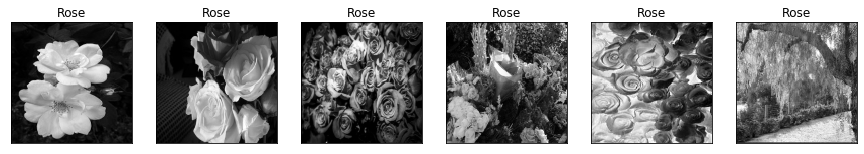

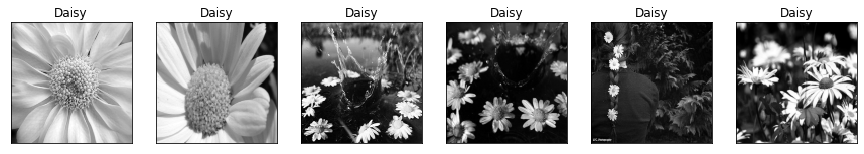

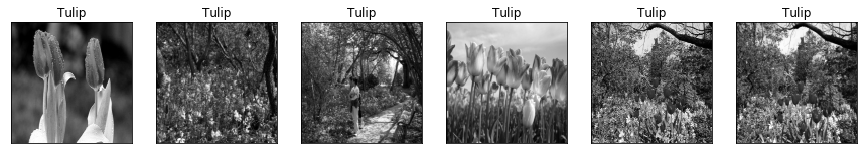

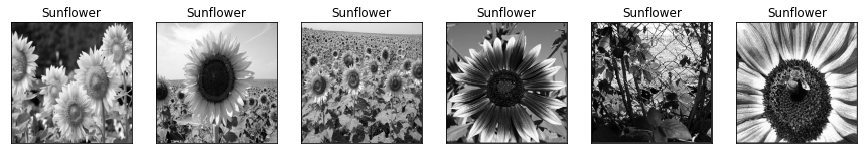

In [5]:
#a helper plotting function
#labels = label_names[label[:]]

def plot_gallery(images, titles, h, w, n_row=1, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(2 * n_col, 3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        #names = ilabel[i]
        
plot_gallery(X[labels == "Rose"], labels, h, w) # defaults to showing a 1 by 6 subset of the images
plot_gallery(X[labels == "Daisy"], labels[800:806], h, w)
plot_gallery(X[labels == "Tulip"], labels[1800:1806], h, w)
plot_gallery(X[labels == "Sunflower"], labels[2600:2606], h, w)

In [6]:
from sklearn.utils import shuffle
X, labels = shuffle(X, labels)

In [7]:
X = X.reshape((-1, 120, 120))
print (X.shape)

(3271, 120, 120)


In [8]:
X = X.reshape((list(X.shape)+[1]))
print(labels[20:50])

['Sunflower' 'Tulip' 'Rose' 'Daisy' 'Tulip' 'Rose' 'Daisy' 'Sunflower'
 'Tulip' 'Daisy' 'Rose' 'Daisy' 'Rose' 'Tulip' 'Tulip' 'Sunflower' 'Tulip'
 'Tulip' 'Tulip' 'Sunflower' 'Tulip' 'Tulip' 'Tulip' 'Rose' 'Daisy'
 'Sunflower' 'Sunflower' 'Daisy' 'Rose' 'Daisy']


In [9]:
y = labels
n_classes = len(np.unique(np.array(labels)))

In [10]:
print(y)
print(n_classes)

['Rose' 'Sunflower' 'Daisy' ... 'Daisy' 'Daisy' 'Rose']
4


## Metric Selection

#### Accuracy score

Our dataset has 4 classes of 4 kinds of flowers. We want to classify each flower into its class correctly. When building a good model it is very necessary to evaluate the performance of the model usng a correct metric. There are various metrics that we can use to evaluate the performance of our model. Some of the metrics we can use are Accuracy, Precision, Recall, F1 score. Accuracy gives us the evaluation based on how many times our model is correctly classifying the data. Precision gives us the ratio of true positives to the sum of true positives and false positives. Recall is similar to precision, but it is the ratio of true positives to sum of true positives and false negatives. If we want to get the evaluation of false positives and false negatives together then F1 score can be used.<br>
For our dataset, we are trying to classify the flowers according to their types. In this case, we are not interested in the outcome of a specific class more than the others. So we are not interested in knowing how many false positives and false negatives our model predicts. We want to know how many times our model is predicting correctly. All classes are equally important in our prediction algorithm.<br>
Considering the above case, we will use accuracy as the metric so that we can evaluate the performance of our model for the overall dataset. We want to find how many flowers belonging to all the classes are being predicted correctly. So to give equal importance to all the classes, we think Accuracy is the best metric.

## Cross Validation Method

Cross-validation is used for the evaluation of the model. For the development of a good machine learning model, it is essential that we have a realistic estimate of how well the model would perform on new data. This is the reason we use cross-validation. There are various methods of dividing our data into training and testing sets, like train test split, k-fold cross-validation, and stratified k-fold cross-validation. Train test split just splits the data randomly into training and testing, k-fold splits the data into k folds and uses one of those folds for testing and the rest for training each time while stratified cross-validation splits the data into k-folds but makes sure that the percentage of data in each class is retained in these folds.

Our dataset has 4 classes which have different number of instances. Class 1,3 and 4 have more or less similar number of instances but class 2 has around 30-35% more instances than the other three classes. Thus we have a little imbalance of data in the classes of this dataset. In this case, using k-fold cross-validation can be an option but that would split the data into k folds randomly. Thus, it can be quite possible that some of the folds have considerably more data from a certain class, and very less data from another.

The solution to this is we use stratified cross-validation. Stratified cross-validation ensures that each fold has the same percentage or proportion of the samples of each class as the complete dataset. Thus, our cross-validation will be able to realistically mirror how the algorithm works.

Also, stratified k-fold cross validation will help us get a good evaluation of the performance of the model as it will train on k-1 folds and test on the kth fold, k number of times. So in this project we will do stratified cross validation with 4 folds. Since the number of samples in our classes do not have a huge difference we think 4 folds will be enough to get estimate of the generalization performance. 

For testing purposes, we will use the 20/80 splits. Our data are not sufficient to rely on the stratified shuffle split. For the modeling, we will use k-fold cross validation with 4 folds. The test of both methods is presented with first architecture test 1 (see below). 

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

tmp = LabelEncoder()

y_ = tmp.fit(y)
y_ =y_.transform(y)
print(y_)

#y = labels
y_ref = np.zeros((len(y_), len(np.unique(y_))))
for i in range (len(y_)):
    y_ref[i][y_[i]-1] = 1
y_ = np.array(y_ref)
print (y_.shape)

[1 2 0 ... 0 0 1]
(3271, 4)


In [12]:
from sklearn.model_selection import train_test_split

#y_ = tmp.fit(y)
#y_ =y_.transform(y)

print (y_.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y_,test_size = 0.2,random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_test)


(3271, 4)
(2616, 120, 120, 1)
(2616, 4)
(655, 120, 120, 1)
(655, 4)


In [13]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)

l = []

def kf(model, v = 0, e = 10, input_shape=(-1, 120,120,1)):
    for train_idx, test_idx in kfold.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y_[train_idx], y_[test_idx]
        
        history_1,model_1,c_1,pred_1, result, prob = model(X_train.reshape(input_shape),X_test.reshape(input_shape),y_train,y_test,v,e) 
        l.append(c_1)
    
    return history_1,model_1,np.mean(np.array(l)),pred_1, result, prob
    

In [14]:
print(y_train)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


# Modeling

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [16]:
def ohe_to_1(dat):
    k = np.zeros(len(dat))
    for i in range (len(dat)):
        ind = np.argmax(dat[i])
        k[i] = ind
    return k

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(8,8))
    y_test = ohe_to_1(y_test)
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))
    

In [17]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train)

In [18]:
print (X_train.shape)

(2616, 120, 120, 1)


## Architectures description 
We have built two architectures using convolutional neural network, which is a Keras Conv2d.
The Conv2D parameter is the numbers of filters that convolutional layers will learn from. The Conv2D parameter is different for both architectures. Since we are using images as a dataset it is important to do a convolution between a kernel and an image. We believe that both architectures will give a good performance for our data set because they have one or two convolutional layers, which are sufficient for our data set.
<br>

### Architecture 1
Here we are learning a total of 16 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume. It is recommended to use powers of 2 as the values. The loss function is MSE, activation function ReLU, while patience is equal to 8. We run this network twice with different kernel sizes.


In [19]:
# Architechture 1 test 1
def arch1_test1(X_train,X_test,y_train,y_test,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    #cnn2.add(input_shape=(40,40,1))
    cnn2.add(Conv2D(filters=16, kernel_size= (10, 10), 
                    padding='same', input_shape=(120,120,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=8)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test,axis =1)), pred)

    
    result = np.round(cnn2.predict(X_test))
    prob = cnn2.predict(X_test)

    
    return history,cnn2,c,pred, result, prob


In [25]:
# comment this line if ran on ManeFrame 

history_1,model_1,c_split,pred_1, result1, prob1 = arch1_test1(X_train,X_test,y_train,y_test,1,50) 


Epoch 1/50
68/68 [==============================] - 77s 1s/step - loss: 0.1900 - acc: 0.3077 - val_loss: 0.1816 - val_acc: 0.3666
Epoch 2/50
68/68 [==============================] - 77s 1s/step - loss: 0.1817 - acc: 0.3559 - val_loss: 0.1829 - val_acc: 0.3140
Epoch 3/50
68/68 [==============================] - 77s 1s/step - loss: 0.1793 - acc: 0.3757 - val_loss: 0.2116 - val_acc: 0.2940
Epoch 4/50
68/68 [==============================] - 79s 1s/step - loss: 0.1768 - acc: 0.4157 - val_loss: 0.1727 - val_acc: 0.4465
Epoch 5/50
68/68 [==============================] - 78s 1s/step - loss: 0.1741 - acc: 0.4255 - val_loss: 0.1656 - val_acc: 0.4846
Epoch 6/50
68/68 [==============================] - 81s 1s/step - loss: 0.1696 - acc: 0.4334 - val_loss: 0.1696 - val_acc: 0.4483
Epoch 7/50
68/68 [==============================] - 80s 1s/step - loss: 0.1714 - acc: 0.4370 - val_loss: 0.1747 - val_acc: 0.3702
Epoch 8/50
68/68 [==============================] - 79s 1s/step - loss: 0.1712 - acc: 0.44

In [27]:
#save for further use
import pickle
h = open('model_1.pickle','wb')
pickle.dump([history_1,model_1,c_split,pred_1, result1, prob1],h)

In [20]:
import pickle
h = open('model_1.pickle','rb')
results_1 = pickle.load(h)
history_1,model_1,c_split,pred_1, result1, prob1 = results_1

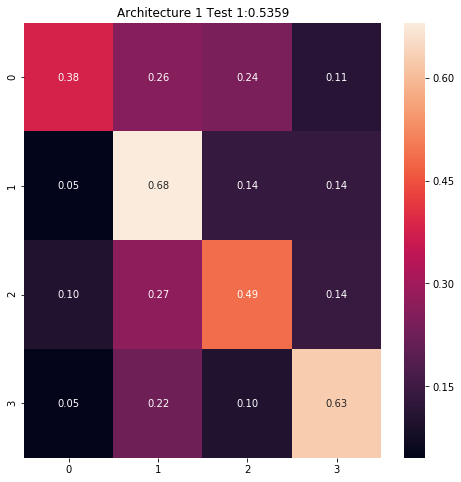

In [21]:
a1t1_split = summarize_net(model_1, X_test, y_test, title_text='Architecture 1 Test 1:')

In [29]:
# commnet this if ran on ManeFrame 
history_1kf,model_1kf,c_kf,pred_1kf, result_1kf, prob_1kf= kf(arch1_test1, 1, 50)


Epoch 1/50
64/64 [==============================] - 77s 1s/step - loss: 0.1958 - acc: 0.3179 - val_loss: 0.1816 - val_acc: 0.3333
Epoch 2/50
64/64 [==============================] - 77s 1s/step - loss: 0.1810 - acc: 0.3823 - val_loss: 0.1808 - val_acc: 0.3522
Epoch 3/50
64/64 [==============================] - 77s 1s/step - loss: 0.1763 - acc: 0.4121 - val_loss: 0.1710 - val_acc: 0.4130
Epoch 4/50
64/64 [==============================] - 77s 1s/step - loss: 0.1744 - acc: 0.4126 - val_loss: 0.1715 - val_acc: 0.4130
Epoch 5/50
64/64 [==============================] - 76s 1s/step - loss: 0.1710 - acc: 0.4415 - val_loss: 0.1676 - val_acc: 0.4551
Epoch 6/50
64/64 [==============================] - 77s 1s/step - loss: 0.1690 - acc: 0.4487 - val_loss: 0.1684 - val_acc: 0.4449
Epoch 7/50
64/64 [==============================] - 77s 1s/step - loss: 0.1668 - acc: 0.4507 - val_loss: 0.1692 - val_acc: 0.4478
Epoch 8/50
64/64 [==============================] - 79s 1s/step - loss: 0.1662 - acc: 0.46

In [30]:
#save for further use
import pickle
h = open('model_1kf.pickle','wb')
pickle.dump([history_1kf,model_1kf,c_kf,pred_1kf,result_1kf, prob_1kf],h)

In [23]:
import pickle
h = open('model_1kf.pickle','rb')
results_1kf = pickle.load(h)
history_1kf,model_1kf,c_kf,pred_1kf,result_1kf, prob_1kf = results_1kf

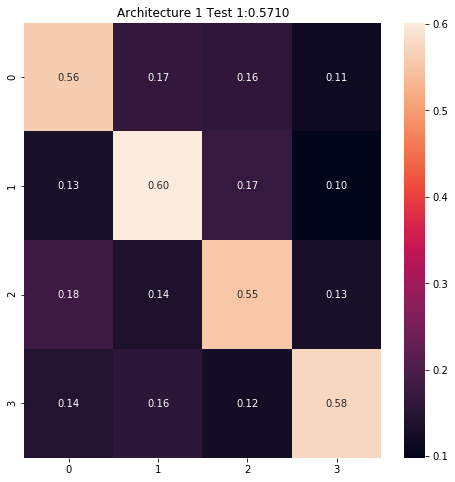

In [24]:
a1t1 = summarize_net(model_1kf, X_test, y_test, title_text='Architecture 1 Test 1:')

In [25]:
print('accuracy of 80/20 split: ' , c_split)
print('accuracy of cross validation: ' , c_kf)

accuracy of 80/20 split:  0.5408348457350273
accuracy of cross validation:  0.5298351605424146


The accuracy of shuffle split appears to be slightly better than the cross-validation. However, we have to keep in mind that size of our data is small, therefore the shuffle split reduces the size of the training. Additionally, cross-validation is a better choice for our data set because it trains on larger training set and lets us evaluate the performance of our model for various folds. Looking at confusion matrices above, we can see that k-fold performed better predicting the flowers categories when compared to shuffle split. 
So, we can get a good estimate of how our model will perform generally. In the next examples we will use the k-fold. 

In [26]:
## Architecture 1 test 2 
def arch1_test2(X_train,X_test,y_train,y_test,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    #cnn2.add(input_shape=(40,40,1))
    cnn2.add(Conv2D(filters=64, kernel_size= (5, 5), 
                    padding='same', input_shape=(120,120,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=8)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test,axis =1)), pred)
    
    result = np.round(cnn2.predict(X_test))
    prob = cnn2.predict(X_test)

    return history,cnn2,c,pred,result,prob


In [35]:
# comment this cell if ran in ManeFrame
history_a1t2,model_a1t2,c_kf_a1t2,pred_a1t2, result_a1t2, prob_a1t2 = kf(arch1_test2, 1, 50)

Epoch 1/50
64/64 [==============================] - 63s 991ms/step - loss: 2.7020 - acc: 0.3237 - val_loss: 1.3203 - val_acc: 0.3884
Epoch 2/50
64/64 [==============================] - 68s 1s/step - loss: 1.3053 - acc: 0.4126 - val_loss: 1.2673 - val_acc: 0.4333
Epoch 3/50
64/64 [==============================] - 74s 1s/step - loss: 1.2438 - acc: 0.4443 - val_loss: 1.3936 - val_acc: 0.3609
Epoch 4/50
64/64 [==============================] - 71s 1s/step - loss: 1.2448 - acc: 0.4399 - val_loss: 1.2042 - val_acc: 0.4667
Epoch 5/50
64/64 [==============================] - 67s 1s/step - loss: 1.2052 - acc: 0.4761 - val_loss: 1.2266 - val_acc: 0.4536
Epoch 6/50
64/64 [==============================] - 70s 1s/step - loss: 1.1774 - acc: 0.4922 - val_loss: 1.1566 - val_acc: 0.5014
Epoch 7/50
64/64 [==============================] - 69s 1s/step - loss: 1.1668 - acc: 0.4966 - val_loss: 1.2937 - val_acc: 0.4551
Epoch 8/50
64/64 [==============================] - 71s 1s/step - loss: 1.1599 - acc: 0

In [38]:
#save for further use
import pickle
h = open('model_a1t2.pickle','wb')
pickle.dump([history_a1t2,model_a1t2,c_kf_a1t2,pred_a1t2, result_a1t2, prob_a1t2],h)

In [27]:
import pickle
h = open('model_a1t2.pickle','rb')
results_a1t2 = pickle.load(h)
history_a1t2,model_a1t2,c_kf_a1t2,pred_a1t2, result_a1t2, prob_a1t2 = results_a1t2

In [28]:
print ('accuracy:', c_kf_a1t2)

accuracy: 0.5508577949565461


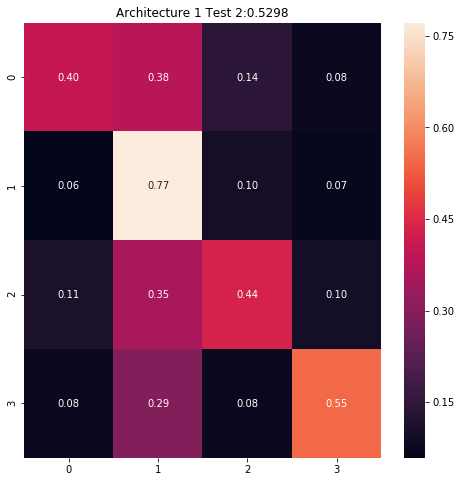

In [29]:
a1t2 = summarize_net(model_a1t2, X_test, y_test, title_text='Architecture 1 Test 2:')

### Architecture 2
For this convolutional neural network we used activation function ReLU. The loss function is categoricat crossentropy, while patience is equal to 10. Here we are learning on two layers with different number of filters and then we use Max Pooling to reduce the spatial dimensions of the output volume. It is recommended to use powers of 2 as the values. Also, we run this network twice with different kernel sizes.  

In [30]:
## Architecture 2 test 1 
def arch2_test1(X_train,X_test,y_train,y_test,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    
    cnn2.add(Conv2D(filters=16, kernel_size= (3, 3), 
                    padding='same', input_shape=(120,120,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(Conv2D(filters=32, kernel_size= (3, 3), 
                    padding='same', input_shape=(120,120,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))

    c = accuracy_score(np.round(np.argmax(y_test,axis =1)), pred)
    
    result = np.round(cnn2.predict(X_test))
    prob = cnn2.predict(X_test)


    return history,cnn2,c,pred,result,prob

In [43]:
# comment this cell if ran in ManeFrame
history_a2t1,model_a2t1,c_kf_a2t1,pred_a2t1, result_a2t1, prob_a2t1 = kf(arch2_test1, 1, 50)


Epoch 1/50
64/64 [==============================] - 71s 1s/step - loss: 1.6107 - acc: 0.3618 - val_loss: 1.3062 - val_acc: 0.3899
Epoch 2/50
64/64 [==============================] - 71s 1s/step - loss: 1.2537 - acc: 0.4282 - val_loss: 1.2361 - val_acc: 0.4246
Epoch 3/50
64/64 [==============================] - 70s 1s/step - loss: 1.1932 - acc: 0.4775 - val_loss: 1.2027 - val_acc: 0.4507
Epoch 4/50
64/64 [==============================] - 71s 1s/step - loss: 1.1544 - acc: 0.4986 - val_loss: 1.2051 - val_acc: 0.4652
Epoch 5/50
64/64 [==============================] - 71s 1s/step - loss: 1.1192 - acc: 0.5176 - val_loss: 1.1463 - val_acc: 0.5043
Epoch 6/50
64/64 [==============================] - 70s 1s/step - loss: 1.0946 - acc: 0.5332 - val_loss: 1.1312 - val_acc: 0.5072
Epoch 7/50
64/64 [==============================] - 71s 1s/step - loss: 1.0811 - acc: 0.5410 - val_loss: 1.0908 - val_acc: 0.5478
Epoch 8/50
64/64 [==============================] - 70s 1s/step - loss: 1.0875 - acc: 0.54

In [44]:
#save for further use
import pickle
h = open('model_a2t1.pickle','wb')
pickle.dump([history_a2t1,model_a2t1,c_kf_a2t1,pred_a2t1, result_a2t1, prob_a2t1],h)

In [31]:
import pickle
h = open('model_a2t1.pickle','rb')
results_a2t1 = pickle.load(h)
history_a2t1,model_a2t1,c_kf_a2t1,pred_a2t1, result_a2t1, prob_a2t1 = results_a2t1

In [32]:
print ('accuracy:', c_kf_a2t1)

accuracy: 0.5852323171964565


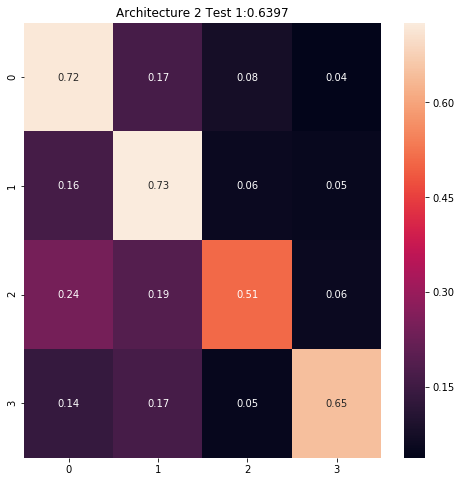

In [33]:
a2t1 = summarize_net(model_a2t1, X_test, y_test, title_text='Architecture 2 Test 1:')

In [34]:
## Architecture 2 test 2 
def arch2_test2(X_train,X_test,y_train,y_test,v,e):
    NUM_CLASSES = n_classes
    cnn2 = Sequential()
    
    cnn2.add(Conv2D(filters=32, kernel_size= (5, 5), 
                    padding='same', input_shape=(120,120,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(Conv2D(filters=64, kernel_size= (5, 5), 
                    padding='same', input_shape=(120,120,1),
                    data_format="channels_last"))
    cnn2.add(Activation('relu'))
    
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES, activation='softmax'))

    # Let's train the model 
    cnn2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras

    bath_size = 32
    history = cnn2.fit_generator(datagen.flow(X_train, y_train, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
                     )
    pred = np.round(np.argmax(cnn2.predict(X_test),axis=1))
        #print(pred,y_test)
    #print (mt.confusion_matrix(np.round(np.argmax(y_test_ohe,axis =1)),pred))
    c = accuracy_score(np.round(np.argmax(y_test,axis =1)), pred)

    result = np.round(cnn2.predict(X_test))
    prob = cnn2.predict(X_test)
    
    
    return history,cnn2,c,pred,result,prob

In [49]:
# comment this cell if ran on ManeFrame
history_a2t2,model_a2t2,c_kf_a2t2,pred_a2t2, result_a2t2, prob_a2t2 = kf(arch2_test2, 1, 50)


Epoch 1/50
64/64 [==============================] - 524s 8s/step - loss: 1.6785 - acc: 0.3384 - val_loss: 1.3185 - val_acc: 0.3826
Epoch 2/50
64/64 [==============================] - 529s 8s/step - loss: 1.2827 - acc: 0.4067 - val_loss: 1.2902 - val_acc: 0.3986
Epoch 3/50
64/64 [==============================] - 533s 8s/step - loss: 1.2331 - acc: 0.4487 - val_loss: 1.1856 - val_acc: 0.4725
Epoch 4/50
64/64 [==============================] - 528s 8s/step - loss: 1.1722 - acc: 0.4878 - val_loss: 1.1312 - val_acc: 0.5232
Epoch 5/50
64/64 [==============================] - 527s 8s/step - loss: 1.1531 - acc: 0.5034 - val_loss: 1.1555 - val_acc: 0.4899
Epoch 6/50
64/64 [==============================] - 535s 8s/step - loss: 1.1218 - acc: 0.5215 - val_loss: 1.1300 - val_acc: 0.5333
Epoch 7/50
64/64 [==============================] - 488s 8s/step - loss: 1.1204 - acc: 0.5196 - val_loss: 1.0651 - val_acc: 0.5623
Epoch 8/50
64/64 [==============================] - 549s 9s/step - loss: 1.0737 - a

In [50]:
#save for further use
import pickle
h = open('model_a2t2.pickle','wb')
pickle.dump([history_a2t2,model_a2t2,c_kf_a2t2,pred_a2t2, result_a2t2, prob_a2t2],h)

In [35]:
import pickle
h = open('model_a2t2.pickle','rb')
results_a2t2 = pickle.load(h)
history_a2t2,model_a2t2,c_kf_a2t2,pred_a2t2, result_a2t2, prob_a2t2 = results_a2t2

In [36]:
print ('accuracy:', c_kf_a2t2)

accuracy: 0.6077653358037497


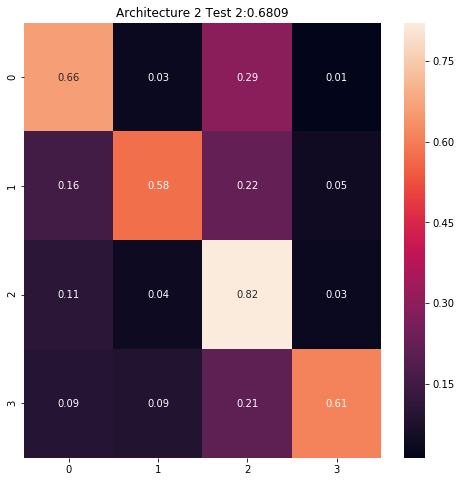

In [37]:
a2t2 = summarize_net(model_a2t2, X_test, y_test, title_text='Architecture 2 Test 2:')

As we can see, both architechtures are giveing pretty good results, with the acuracy from 54-60%. When comparing the accuracies the best performace is given by Arch2_test2, for which the confussion matrix shows the best predition for class 2 (tulips). 

### Ensemble net
For comparison we used ensemble net. The design of ENS is completely different that previous models. Here, ensemble learning was involved to train on several networks on the same dataset. Then it supposed to use each of the trained models to make a prediction before combining the predictions in some way to make a final outcome or prediction. However, it got overstrained.

In [38]:
%%time

from keras.layers import average, concatenate
from keras.models import Input, Model

def ensemble_net(X_train,X_test,y_train,y_test,v,e):
    num_ensembles = 2
    l2_lambda = 0.0001
    h = 120
    channels = 1
    NUM_CLASSES = n_classes

    input_holder = Input(shape=(h, h, channels))

    # start with a conv layer
    x = Conv2D(filters=32,
                   input_shape = (h,h,channels),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu', data_format="channels_last")(input_holder)
    x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')(x)
    input_conv = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)
    
    branches = []
    for _ in range(num_ensembles):
          
        # start using NiN (MLPConv)
        x = Conv2D(filters=32,
                       input_shape = (h,h,1),
                       kernel_size=(3,3),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='linear', data_format="channels_last")(input_conv)

        x = Conv2D(filters=32,
                       kernel_size=(1,1),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='relu', data_format="channels_last")(x)

        x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

        x = Conv2D(filters=64,
                       input_shape = (h,h,1),
                       kernel_size=(3,3),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='linear', data_format="channels_last")(x)

        x = Conv2D(filters=64,
                       kernel_size=(1,1),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       activation='linear', data_format="channels_last")(x)

        x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

        # add one layer on flattened output
        x = Flatten()(x)
        x = Dropout(0.50)(x) # add some dropout for regularization after conv layers
        x = Dense(64, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                )(x)

        x = Dense(NUM_CLASSES, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 )(x)

        # now add this branch onto the master list
        branches.append(x)

    # that's it, we just need to average the results
    x = concatenate(branches)

    x = Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             )(x)

    # here is the secret sauce for setting the network using the 
    #   Functional API:
    cnn_ens = Model(inputs=input_holder,outputs=x)

    print(cnn_ens.summary())

    cnn_ens.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                    optimizer='adam', # 'adadelta' 'rmsprop'
                    metrics=['accuracy'])
    
    bath_size = 32
    history = cnn_ens.fit_generator(datagen.flow(X_train, y_train, batch_size=bath_size), 
                      steps_per_epoch=int(len(X_train)/bath_size), # how many generators to go through per epoch
                      epochs=e, verbose=v,
                      validation_data=(X_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=8)]
                     )
    pred = np.round(np.argmax(cnn_ens.predict(X_test),axis=1))
        #print(pred,y_test)
    c = accuracy_score(np.round(np.argmax(y_test,axis =1)), pred)
    
    result = np.round(cnn_ens.predict(X_test))
    prob = cnn_ens.predict(X_test)
   

    return history,cnn_ens,c,pred,result,pred

Wall time: 0 ns


In [34]:
# Comment this cell if ran on ManeFrameII
history_ens,model_ens,c_ens,pred_ens, result_ens, prob_ens= kf(ensemble_net, 1, 50)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 120, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 120, 120, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 120, 120, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 60, 60, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [35]:
#save for further use
import pickle
h = open('model_ens.pickle','wb')
pickle.dump([history_ens,model_ens,c_ens,pred_ens, result_ens, prob_ens],h)

In [39]:
import pickle
h = open('model_ens.pickle','rb')
results_ens = pickle.load(h)
history_ens,model_ens,c_ens,pred_ens, result_ens, prob_ens = results_ens

In [40]:
print ('accuracy:', c_ens)

accuracy: 0.31917230963998977


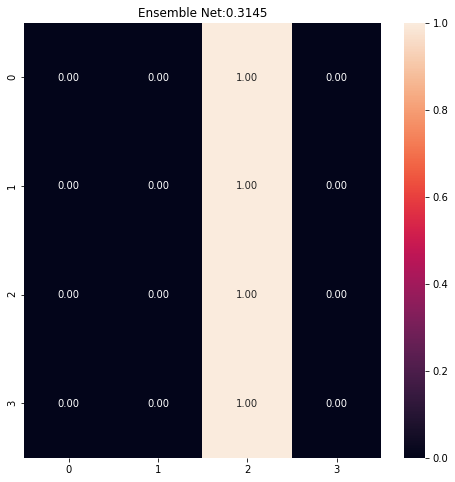

In [41]:
mens = summarize_net(model_ens, X_test, y_test, title_text='Ensemble Net:')

The ensemble net gets overstrained and therefore it does not provide any meaningful information. Its performance is very low as compared to other architectures. ENS is suitable for bigger data set where the training on several networks would be appropriate. 

### Visualizing the performance of training and validation sets

Text(0.5, 0, 'epochs')

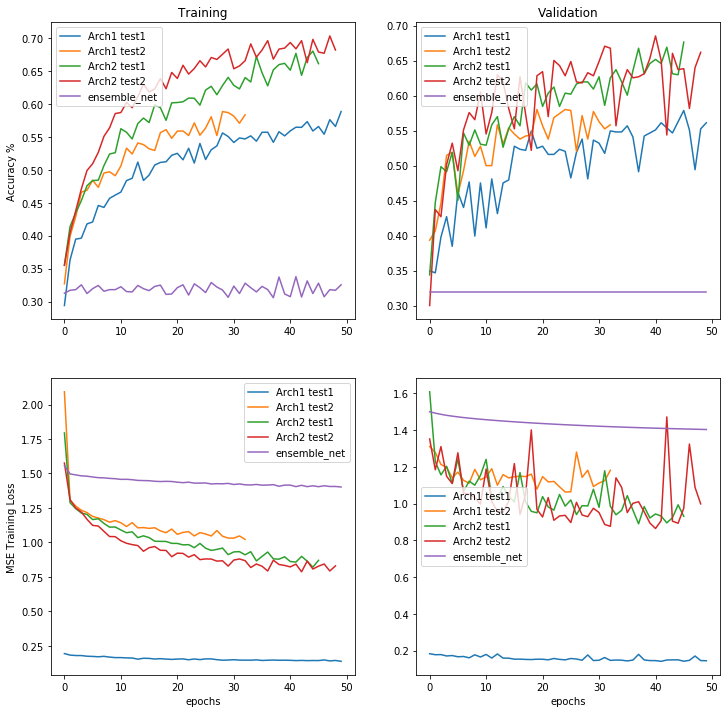

In [48]:
from matplotlib import pyplot as plt

%matplotlib inline

legends=['Arch1 test1','Arch1 test2','Arch2 test1','Arch2 test2','ensemble_net']
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(history_1kf.history['acc'])
plt.plot(history_a1t2.history['acc'])
plt.plot(history_a2t1.history['acc'])
plt.plot(history_a2t2.history['acc'])
plt.plot(history_ens.history['acc'])
plt.legend(legends)

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_1kf.history['val_acc'])
plt.plot(history_a1t2.history['val_acc'])
plt.plot(history_a2t1.history['val_acc'])
plt.plot(history_a2t2.history['val_acc'])
plt.plot(history_ens.history['val_acc'])
plt.legend(legends)
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history_1kf.history['loss'])
plt.plot(history_a1t2.history['loss'])
plt.plot(history_a2t1.history['loss'])
plt.plot(history_a2t2.history['loss'])
plt.plot(history_ens.history['loss'])
plt.ylabel('MSE Training Loss')
plt.legend(legends)
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_1kf.history['val_loss'])
plt.plot(history_a1t2.history['val_loss'])
plt.plot(history_a2t1.history['val_loss'])
plt.plot(history_a2t2.history['val_loss'])
plt.plot(history_ens.history['val_loss'])
plt.legend(legends)
plt.xlabel('epochs')

From the graphs above, we can see that 50 epochs for each model are sufficient for our data set. The ensemble net gets overtrained which is visible compared to other methods. Due to the smaller size of the data, we observe the fluctuation on the validation data. However, the general trend of the curves shows that the models are converaging.

### Visualizing final results of CNNs

In [49]:
print ('Accuracy of Arcitecure 1 test 1:', c_kf)
print ('Accuracy of Arcitecure 1 test 2:', c_kf_a1t2)
print ('Accuracy of Arcitecure 2 test 1:', c_kf_a2t1)
print ('Accuracy of Arcitecure 2 test 2:', c_kf_a2t2)
print ('Accuracy of Ensemble Net:', c_ens)

Accuracy of Arcitecure 1 test 1: 0.5298351605424146
Accuracy of Arcitecure 1 test 2: 0.5508577949565461
Accuracy of Arcitecure 2 test 1: 0.5852323171964565
Accuracy of Arcitecure 2 test 2: 0.6077653358037497
Accuracy of Ensemble Net: 0.31917230963998977


Comparing the accuracies of the models we can see that the best performance we get is for our second type of architecture for test 2.

In [50]:
df2 = pd.DataFrame()
df2['Arch1_test1'] = [c_kf]
df2['Arch1_test2'] = [c_kf_a1t2]
df2['Arch2_test1'] = [c_kf_a2t1]
df2['Arch2_test2'] = [c_kf_a2t2]

[Text(0, 0.5, 'Accuracy Score')]

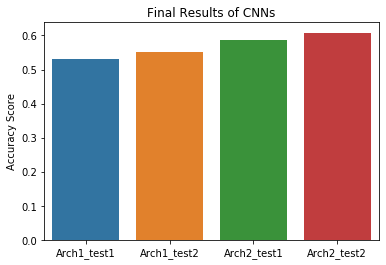

In [51]:
labels = list(df2.columns)
Perf_optimization = sns.barplot(labels, df2.iloc[0,:])
#plt.subplot(1,2,2)
plt.title('Final Results of CNNs')
Perf_optimization.set(ylabel="Accuracy Score")

Since we are using Accuracy as a metric, above plot can be used to visualize the performance of our models. It is clear that Architecture 2 type 2 is giving us the best accuracy score among all the models. Thus, this architecture is our best model. We will now use this model for comparison with standard Multi Layer Perceptron.

### Comparison with MLP

In [52]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

sk_mlp = MLPClassifier()

nsamples, nx, ny, ch = X_train.shape
X_train1 = X_train.reshape((nsamples,nx*ny))
y_train1 = y_train

nsamples, nx, ny, ch = X_test.shape
X_test1 = X_test.reshape((nsamples,nx*ny))
y_test1 = y_test
print(X_test1.shape)
print(X_train1.shape)
sk_mlp.fit(X_train1, y_train)
pred_mlp = sk_mlp.predict(X_test1)

# take cost
c_mlp = accuracy_score(y_test, pred_mlp)
c_mlp

(655, 14400)
(2616, 14400)
Wall time: 4min 3s


0.20305343511450383

In [53]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(8,8))
    y_test = ohe_to_1(y_test)
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))

def compare_mlp_cnn(cnn, mlp, X_test, y_test):
    #X_test = X_test.reshape((-1, 120, 120, 1))
    y_test_cnn = ohe_to_1(y_test)
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test_cnn,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test_cnn,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f')
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        nsamples, nx, ny, ch = X_test.shape
        X_test = X_test.reshape((nsamples,nx*ny))
        yhat_mlp = mlp.predict(X_test)
        print (y_test.shape, yhat_mlp.shape)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        y_test = ohe_to_1(y_test)
        yhat_mlp = ohe_to_1(yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f')
        plt.title('MLP: '+str(acc_mlp))

(655, 4) (655, 4)


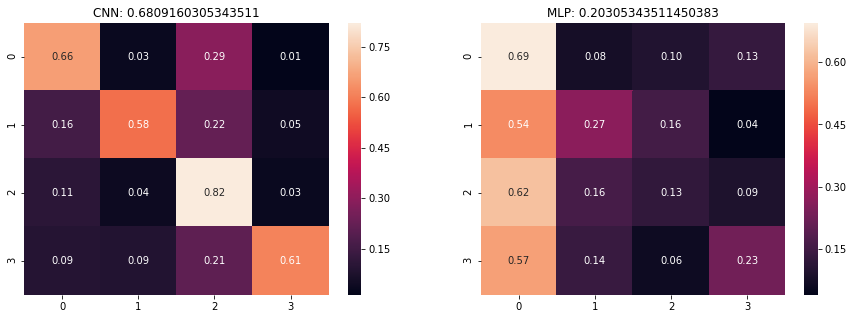

In [54]:
compare_mlp_cnn(model_a2t2,sk_mlp,X_test,y_test)

Above, we have compared our best model (arch2_test2) with the MLP. CNN has spatial information that are lost in MLP. Therefore we can observe the higher performance of CNN compared to MLP.  

#### ROC Plot = statistical comparation 

A receiver operating characteristic curve, is a plot that illustrates the diagnostic ability of our classification system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. Here we will calculate the ROC for Architechture 2 test 2. 25 epochs will be sufitient for our data because the model get optimized after 25 epochs and there was no improvement in validation loss. 

In [55]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2616, 120, 120, 1)
(2616,)
(655, 120, 120, 1)
(655,)


In [57]:
tmp = LabelEncoder()

y_ = tmp.fit(y)
y_train2 =y_.transform(y_train)
#print(y_train2)
#y_train = y_
y_test2 = y_.transform(y_test)
#print(y_test2)

In [58]:
lw = 3

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

costs_2 = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=54)
ref = 1

#Create some variable to save each k-fold value

fpr_arch2 = []
tpr_arch2 = []
roc_auc_macro_arch2 = []

fpr_all_arch2 = []
tpr_all_arch2 = []
roc_auc_macro_all_arch2 = []


for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    
    X_train_temp = X_train[train_idx]
    y_train_temp = keras.utils.to_categorical(y_train[train_idx], n_classes)
    X_test_temp = X_train[test_idx]
    y_test_temp = keras.utils.to_categorical(y_train[test_idx], n_classes)
    
    # take cost
    history,model,c,pred,result,prob = arch2_test2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,1,25) 
    costs_2.append(c)
    
    
    y_score = result
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_temp[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_temp.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    fpr_arch2.append(fpr["micro"])
    tpr_arch2.append(tpr["micro"])
    roc_auc_macro_arch2.append(roc_auc["micro"])


# Compute macro-average ROC curve and ROC area
    lw = 3
# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    fpr_all_arch2.append(fpr["macro"])
    tpr_all_arch2.append(tpr["macro"])
    roc_auc_macro_all_arch2.append(roc_auc["macro"])
    
    
    # print confusion matrix
    print(mt.confusion_matrix(np.round(np.argmax(y_test_temp,axis =1)),pred), "=>", c)
    ref+=1

print(costs_2)

Now at step 1 in kfold ...
Epoch 1/25
51/51 [==============================] - 47s 924ms/step - loss: 0.2536 - acc: 0.3097 - val_loss: 0.1823 - val_acc: 0.3852
Epoch 2/25
51/51 [==============================] - 43s 851ms/step - loss: 0.1809 - acc: 0.3740 - val_loss: 0.1829 - val_acc: 0.3960
Epoch 3/25
51/51 [==============================] - 44s 866ms/step - loss: 0.1763 - acc: 0.4042 - val_loss: 0.1765 - val_acc: 0.4250
Epoch 4/25
51/51 [==============================] - 44s 865ms/step - loss: 0.1729 - acc: 0.4235 - val_loss: 0.1937 - val_acc: 0.3689
Epoch 5/25
51/51 [==============================] - 44s 868ms/step - loss: 0.1705 - acc: 0.4349 - val_loss: 0.1596 - val_acc: 0.4828
Epoch 6/25
51/51 [==============================] - 44s 855ms/step - loss: 0.1662 - acc: 0.4511 - val_loss: 0.1587 - val_acc: 0.4756
Epoch 7/25
51/51 [==============================] - 44s 856ms/step - loss: 0.1676 - acc: 0.4481 - val_loss: 0.1570 - val_acc: 0.5009
Epoch 8/25
51/51 [========================

In [36]:
#save for further use
import pickle
h = open('roc.pickle','wb')
pickle.dump([roc_auc_macro_arch2, tpr_arch2,fpr_arch2],h)

In [59]:
import pickle
h = open('roc.pickle','rb')
results_roc = pickle.load(h)
roc_auc_macro_arch2, tpr_arch2,fpr_arch2,fpr_all_arch2, tpr_all_arch2,roc_auc_macro_all_arch2 = results_roc

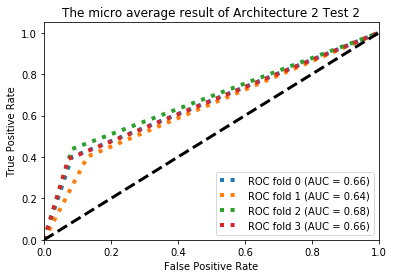

The average ROC is: 0.6578141268014687


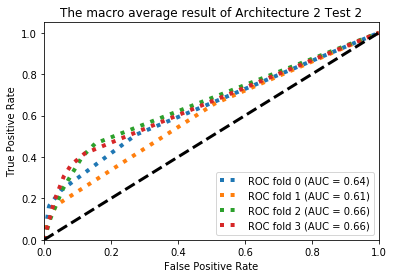

The average ROC is: 0.6408046281755804


In [60]:
for i in range(len(fpr_arch2)):
    plt.plot(fpr_arch2[i], tpr_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch2[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 2 Test 2')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_arch2))



for i in range(len(fpr_all_arch2)):
    plt.plot(fpr_all_arch2[i], tpr_all_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch2[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 2 Test 2')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch2))

In the plots above, we can see that all of the fold's curves follow the left-hand border up to 0.65 true positive value, and then the ROC space come closer to the 45-degree diagonal of the ROC space. This show the potential of our model. 

MLP : 0.3419847328244275


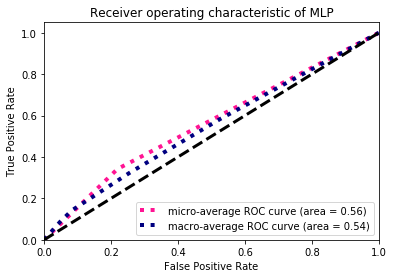

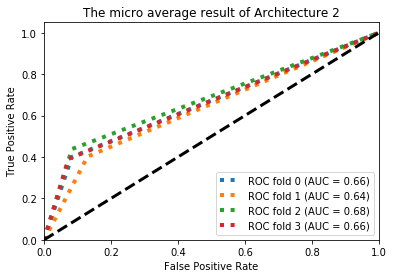

The average ROC is: 0.6578141268014687


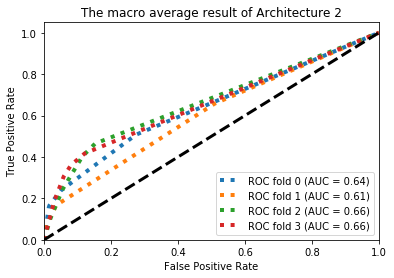

The average ROC is: 0.6408046281755804


In [61]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score

mods = [MLP()]
dic = {1:'MLP'}
count = 1
for mod in mods:
    mod.fit(X_train1,y_train)
    y_pred = mod.predict(X_test1)
    y_pred2 = y_.transform(y_pred)
    #print (y_pred)
    print (dic[count],':',accuracy_score(y_test,y_pred ))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test1 = keras.utils.to_categorical(y_test2, n_classes) 
    y_score = keras.utils.to_categorical(y_pred2, n_classes)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of MLP')
    plt.legend(loc="lower right")
    plt.show()
    count+=1
    
for i in range(len(fpr_arch2)):
    plt.plot(fpr_arch2[i], tpr_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_arch2[i]),
              linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The micro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()
print("The average ROC is:" ,np.mean(roc_auc_macro_arch2))
for i in range(len(fpr_all_arch2)):
    plt.plot(fpr_all_arch2[i], tpr_all_arch2[i],
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_macro_all_arch2[i]),
              linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The macro average result of Architecture 2')
plt.legend(loc="lower right")
plt.show()

print("The average ROC is:" ,np.mean(roc_auc_macro_all_arch2))

We have compared the performance of our best Convolutional Neural Network Architecture to a standard Multi Layer perceptron above.<br>
As we can see, the accuracy of the MLP is very low as compared to our architecture. It is just around 31% whereas the accuracy of our model is about 60%. Thus, the ROC area under the curve for MLP is also less as compared to our best model. The area under the curve for the MLP is 0.53 whereas for our model, it is 0.66. This means that our best model is performing better than the standard Multi Layer perceptron in terms of Area under the curve.